<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/Qiskit_%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install qiskit[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━

In [2]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram

**Plot Histogram**

2-큐비트 벨(Bell)-중첩상태 상태 만들기

In [17]:
# Quantum circuit to make a Bell State
bell = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
bell.h(qubit=0)
bell.cx(control_qubit=0, target_qubit=1)

meas = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2))
meas.measure(qubit=[0, 1], cbit=[0, 1])

# execute the quantum circuit
backend = BasicAer.get_backend(name='qasm_simulator') # the device to run on
circ = bell.compose(other=meas)
result = backend.run(qobj=transpile(circuits=circ, backend=backend), shots=1000).result()
counts = result.get_counts(experiment=circ)
print(counts)

{'11': 476, '00': 524}


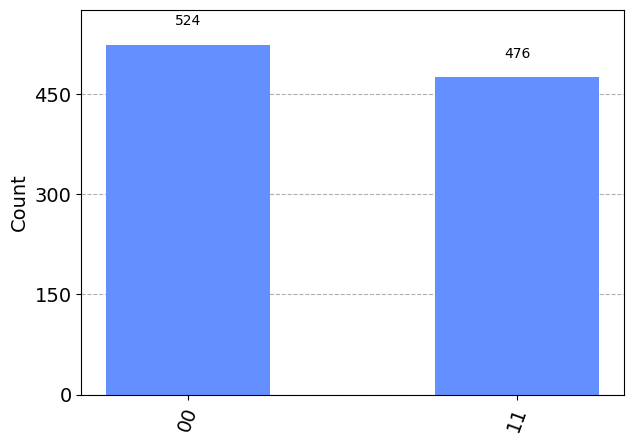

In [19]:
plot_histogram(data=counts)

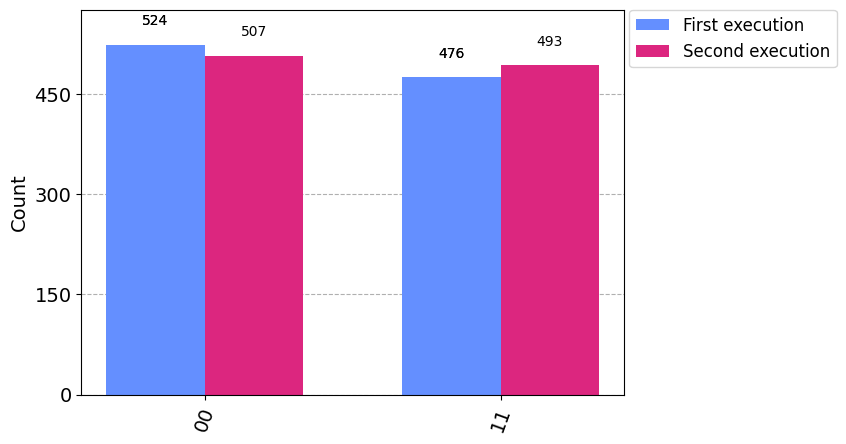

In [23]:
# Execute 2-qubit Bell state again
second_result = backend.run(qobj=transpile(circuits=circ, backend=backend), shots=1000).result()
second_counts =  second_result.get_counts(experiment=circ)

# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram(data=[counts, second_counts], legend=legend)